In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading data
table_data = pd.read_csv('./Data/cluster_data.csv')
table = table_data.loc[:,'income':'gender']


#defining functions
def show_cluster(data,label):
    plt.figure()
    plt.figure(figsize=(5,5))
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.xlabel('Component 1',fontsize=10)
    plt.ylabel('Component 2',fontsize=10)
    plt.title("Visual of the clusters",fontsize=10)
    colors = {0:'r', 1:'g', 2:'b', 3:'y', 4:'m', 5:'k', 6:'c', 7:'darkgreen'}
    for i in data.index:
        plt.scatter(data.loc[i, 'component1'],
                    data.loc[i, 'component2'], c = colors[label[i]], s = 1.5)
    
table

,income,age,years_with_bank,nbr_children,gender
0,50890,33,3,2,M
1,10053,42,2,0,F
2,22690,25,4,0,F
3,10701,76,6,0,F
4,6605,71,1,0,M
...,...,...,...,...,...
567,19863,48,8,0,F
568,39942,41,1,5,F
569,0,15,7,0,F
570,30068,69,5,0,M


In [3]:
table['gender'] =pd.factorize(table.gender)[0]

table


,income,age,years_with_bank,nbr_children,gender
0,50890,33,3,2,0
1,10053,42,2,0,1
2,22690,25,4,0,1
3,10701,76,6,0,1
4,6605,71,1,0,0
...,...,...,...,...,...
567,19863,48,8,0,1
568,39942,41,1,5,1
569,0,15,7,0,1
570,30068,69,5,0,0


In [4]:
#normalizing the table values
x = table.loc[:, table.columns].values
x = StandardScaler().fit_transform(x)
table_norm = pd.DataFrame(x,columns = table.columns)
#table_norm.to_csv('./Data/sample_for_cluster_algorithm.csv', index_label=False)
table_norm.head(5)

,income,age,years_with_bank,nbr_children,gender
0,2.135173,-0.468374,-0.293973,1.202663,-1.223853
1,-0.546539,-0.004148,-0.662729,-0.617240,0.817091
2,0.283316,-0.881019,0.074783,-0.617240,0.817091
3,-0.503986,1.749593,0.812294,-0.617240,0.817091
4,-0.772965,1.491690,-1.031485,-0.617240,-1.223853


In [5]:
#checking the normalization result
np.mean(table_norm),np.std(table_norm)

(income             4.658278e-17
 age                3.726623e-17
 years_with_bank    1.024821e-16
 nbr_children       2.173863e-17
 gender            -2.794967e-17
 dtype: float64,
 income             1.0
 age                1.0
 years_with_bank    1.0
 nbr_children       1.0
 gender             1.0
 dtype: float64)

In [6]:
#reducing the features to 2 dimensions
pca_table_init = PCA(n_components=2)
components_table = pca_table_init.fit_transform(table_norm)

pca_table = pd.DataFrame(data = components_table, columns = ['component1', 'component2'])

pca_table

,component1,component2
0,1.948715,-1.640447
1,-0.943534,0.178247
2,-0.533005,-0.033239
3,0.206767,2.031804
4,-0.381371,0.482853
...,...,...
567,0.217598,1.530713
568,2.588396,-2.767651
569,-1.515789,0.548434
570,1.048780,1.028075


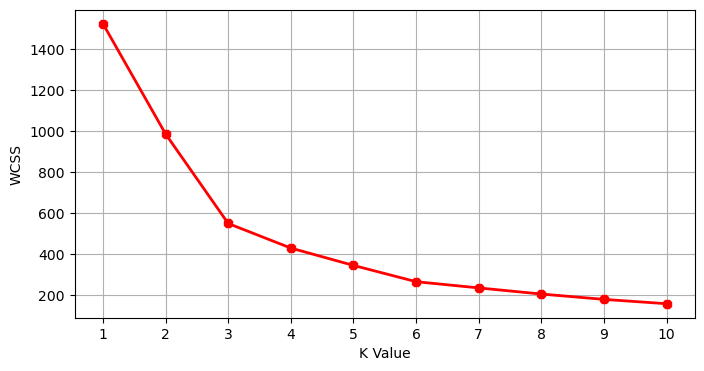

In [7]:
#plotting elbow
wcss = []
for k in range(1,11):
    km = KMeans(n_clusters=k, init="k-means++")
    km.fit(pca_table)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,4))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()    

In [8]:
#running the 3k cluster
km = KMeans(n_clusters = 3, n_init=10, init="k-means++",)
table3k = km.fit_predict(pca_table)

<Figure size 640x480 with 0 Axes>

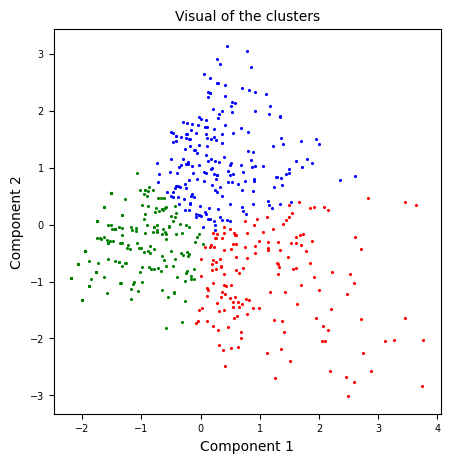

In [9]:
#visualizing 3k clusters
show_cluster(pca_table,table3k)

In [10]:
#running the 4k cluster
km = KMeans(n_clusters = 4, n_init=10, init="k-means++",)
table4k = km.fit_predict(pca_table)


<Figure size 640x480 with 0 Axes>

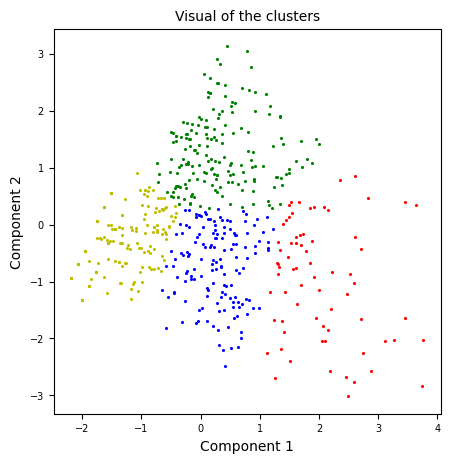

In [11]:
#visualizing 4k clusters
show_cluster(pca_table,table4k)

In [12]:
#running the 5k cluster
km = KMeans(n_clusters = 5, n_init=10, init="k-means++",)
table5k = km.fit_predict(pca_table)

<Figure size 640x480 with 0 Axes>

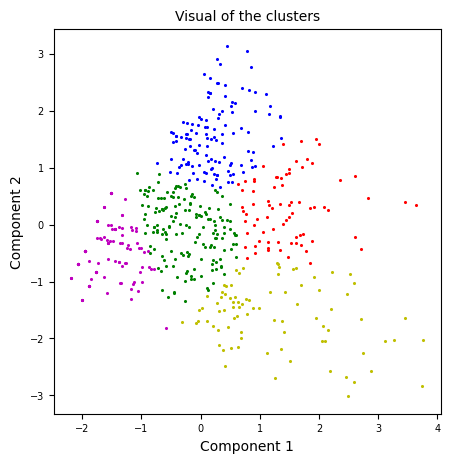

In [13]:
#visualizing 5k clusters
show_cluster(pca_table,table5k)